# Minimum free energy paths in analytical potential energy landscapes

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from stringmethod import stringmethod

## Potential from Weinan E et al. J Chem Phys (2007)

We'll first apply the string method to the example described in the simplified string method paper (https://aip.scitation.org/doi/pdf/10.1063/1.2720838).

In [2]:
def example_potential(x, y):
    return (1 - x ** 2 - y ** 2) ** 2 + y ** 2 / (x ** 2 + y ** 2)

In [3]:
x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-0.2, 1.2, 100)
xx, yy = np.meshgrid(x, y)
V = example_potential(xx, yy)

### Setup String2D

In [4]:
S = stringmethod.String2D(x, y, V)

Plot potential:

(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f8210c4a710>)

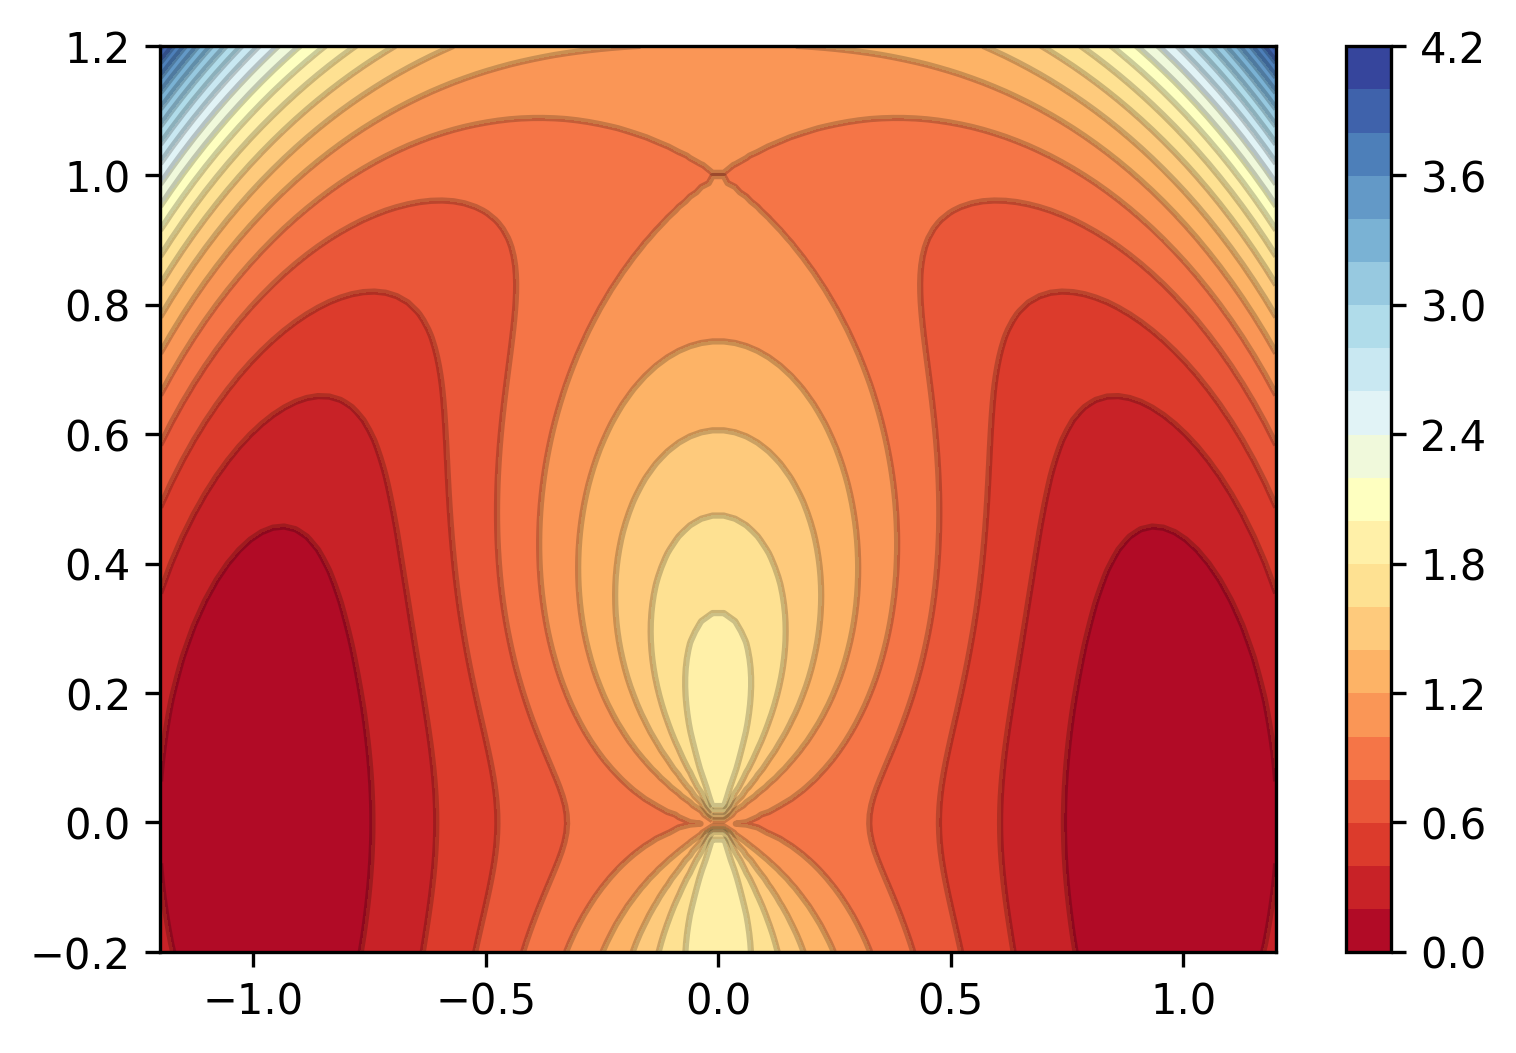

In [5]:
S.plot_V(levels=20)

Plot gradients:

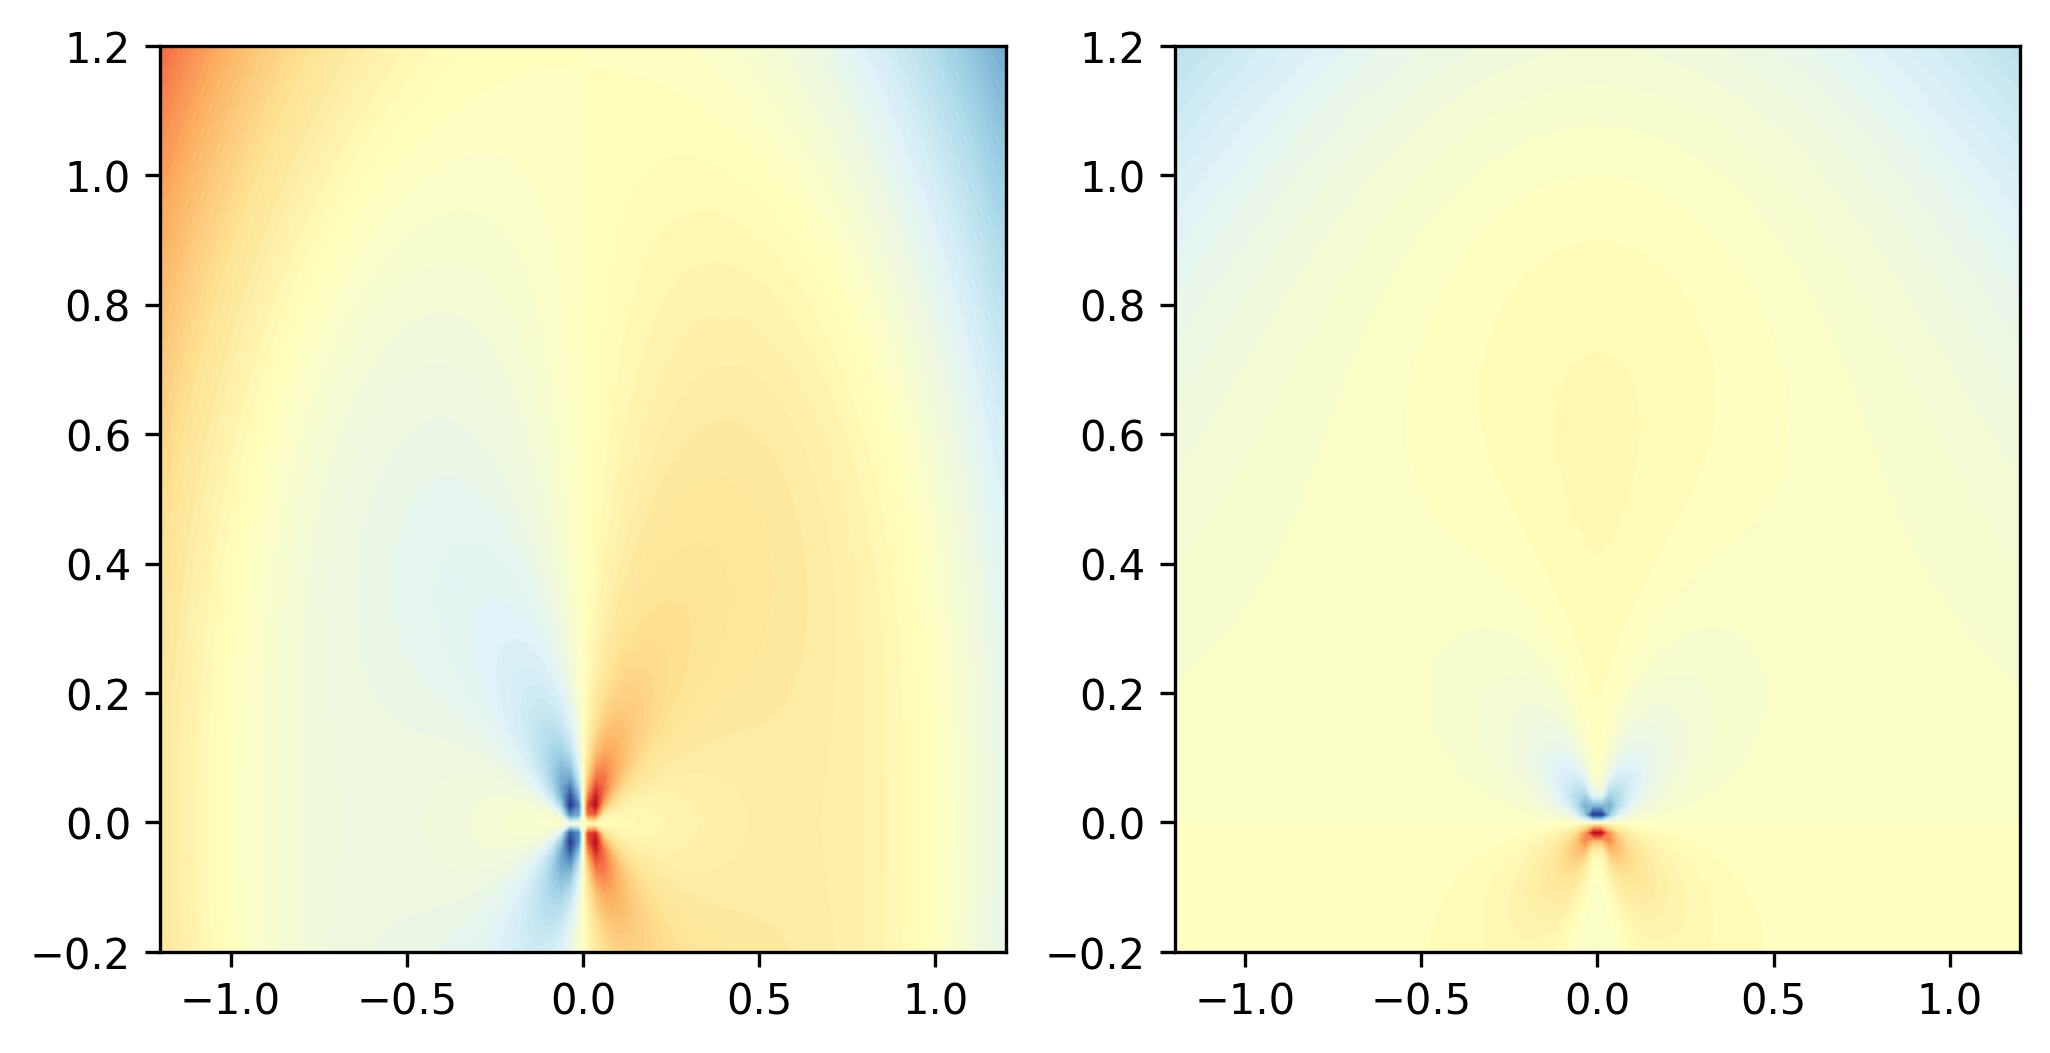

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=300)
ax[0].contourf(xx, yy, S.gradX, levels=100, cmap="RdYlBu")
ax[1].contourf(xx, yy, S.gradY, levels=100, cmap="RdYlBu")

### Compute string

In [7]:
S.compute_mep(begin=[-1, 0], mid=[[0, 1]], end=[1, 0], spline_order=1, maxsteps=50, traj_every=10)

 20%|████████▌                                  | 10/50 [00:06<00:26,  1.50it/s]

Change in string: 0.0151368541


 40%|█████████████████▏                         | 20/50 [00:14<00:22,  1.31it/s]

Change in string: 0.0169037913


 60%|█████████████████████████▊                 | 30/50 [00:21<00:16,  1.20it/s]

Change in string: 0.0038288621


 80%|██████████████████████████████████▍        | 40/50 [00:32<00:11,  1.11s/it]

Change in string: 0.0011314603


100%|███████████████████████████████████████████| 50/50 [00:40<00:00,  1.24it/s]

Change in string: 0.0003226378


(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f82120718d0>)

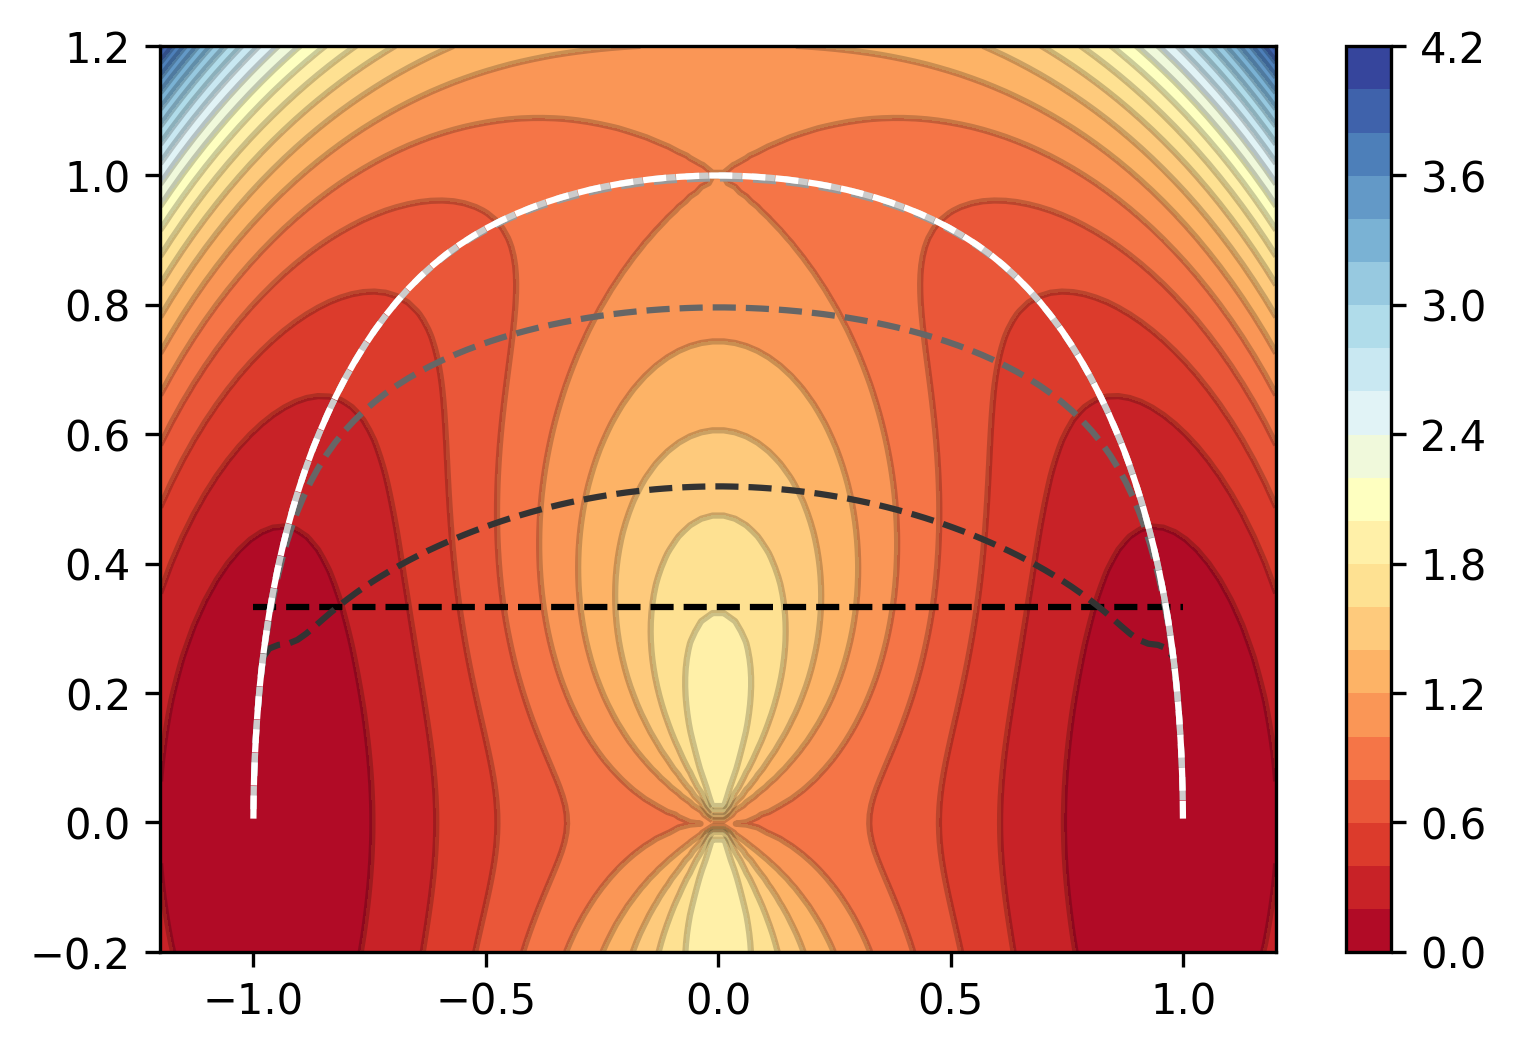

In [8]:
S.plot_string_evolution(levels=20)

(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f8211fa48d0>)

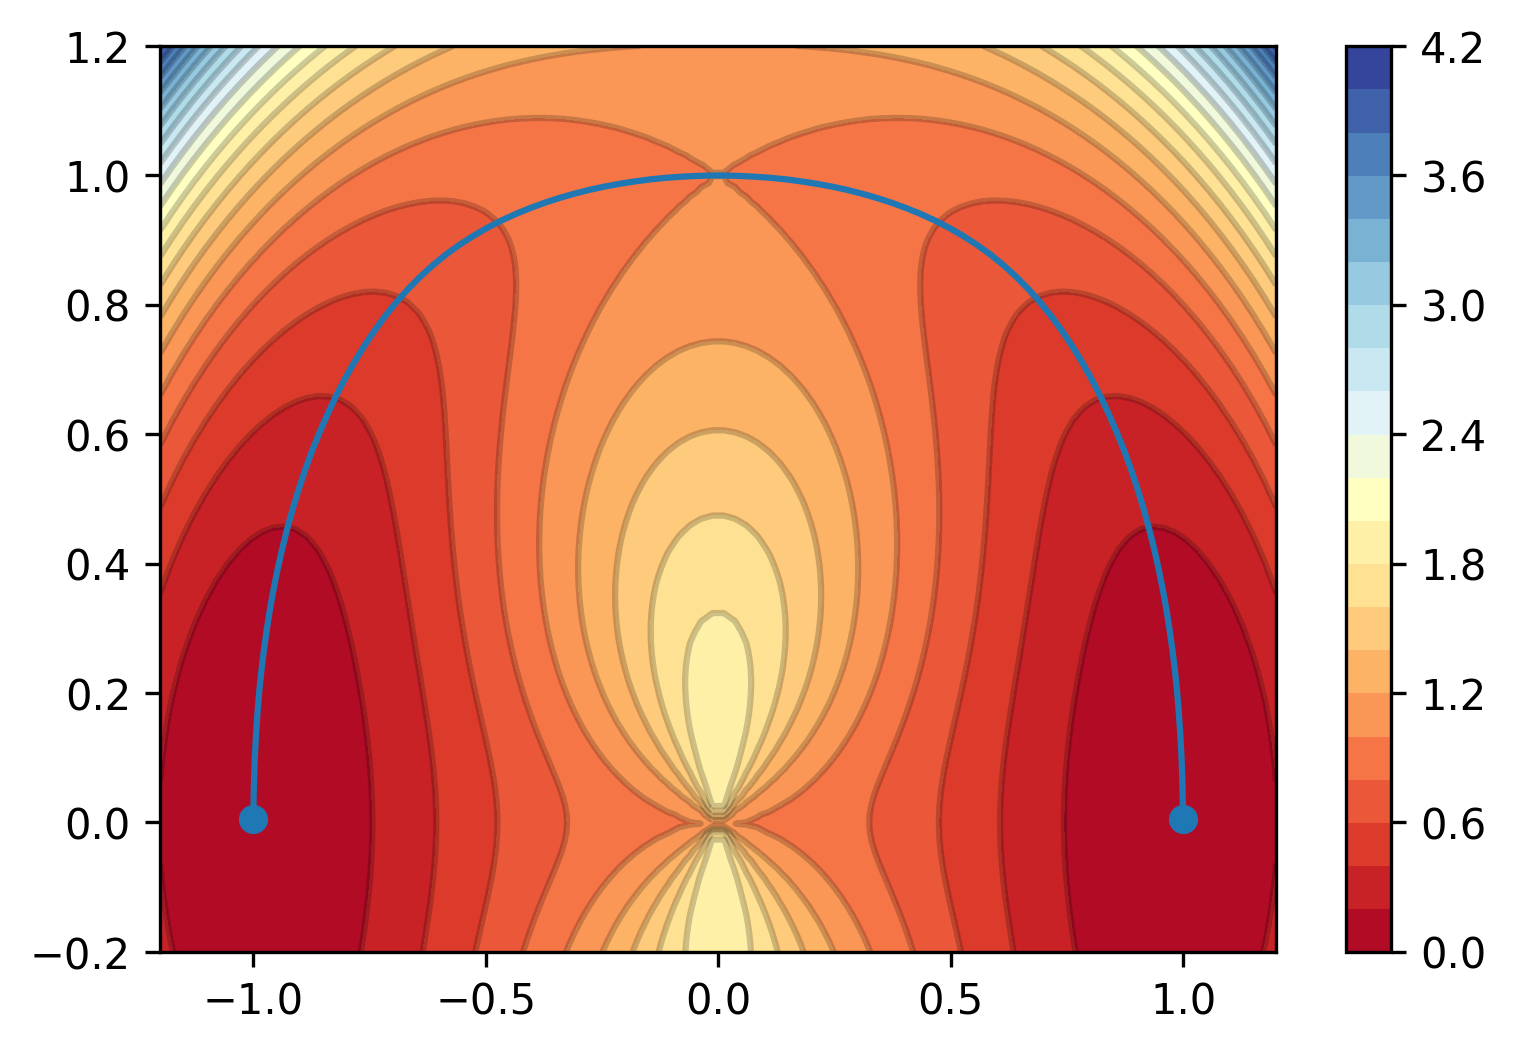

In [9]:
S.plot_mep(levels=20)

(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8212d263d0>)

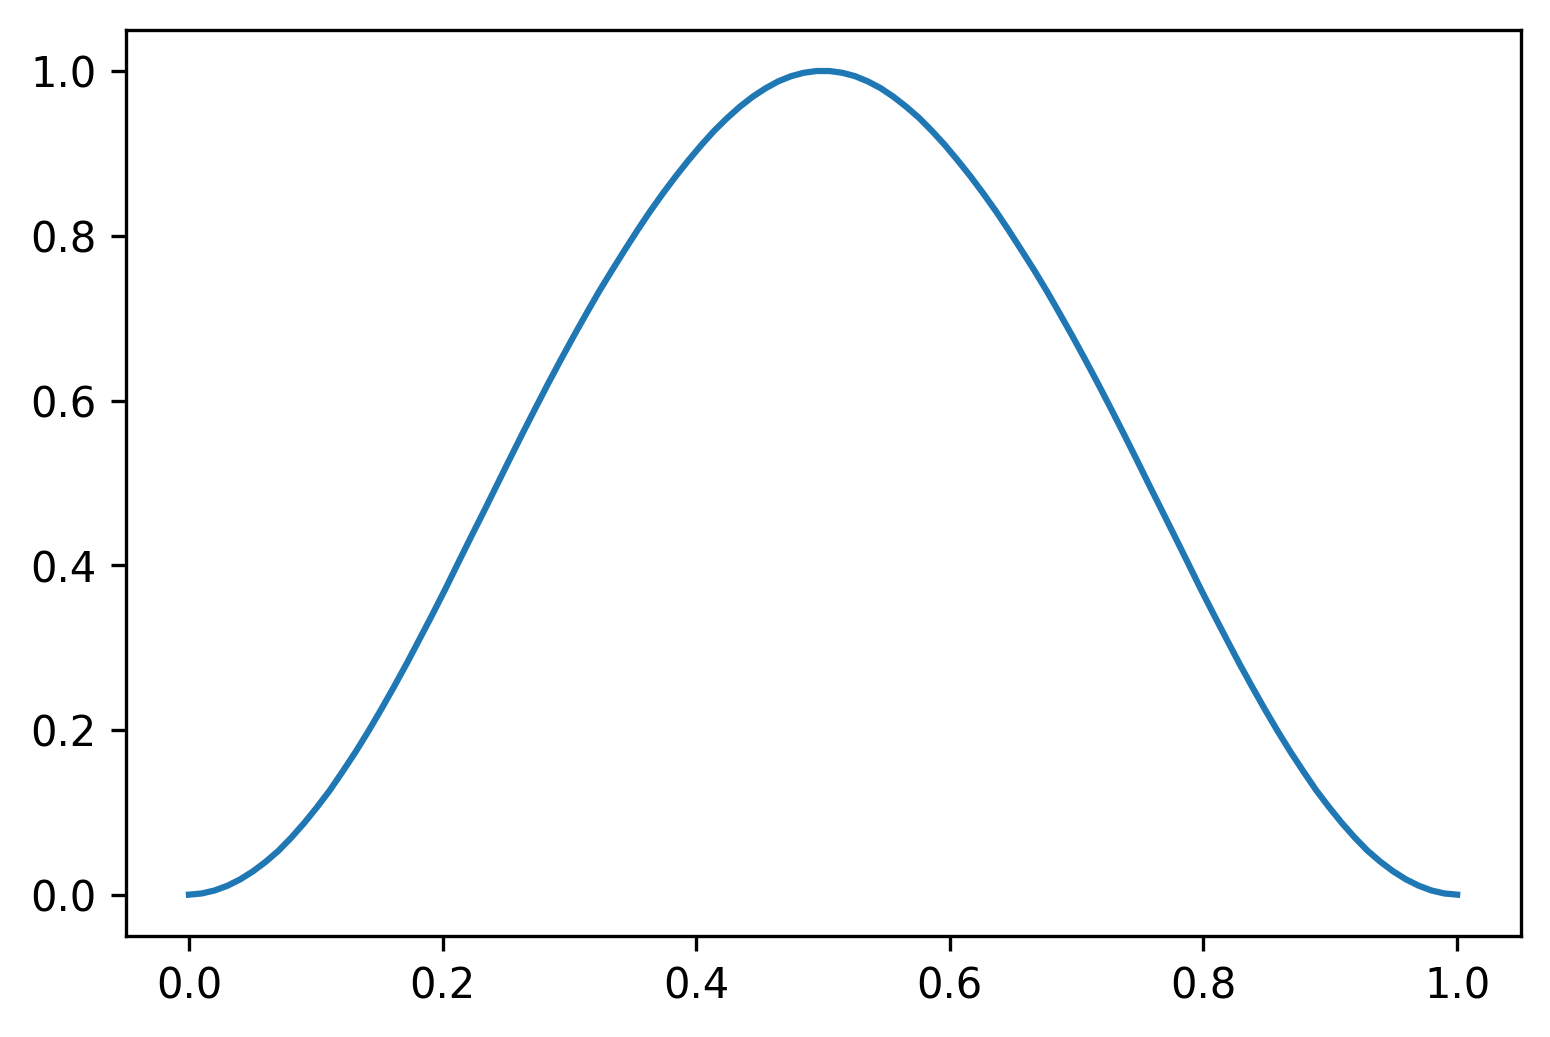

In [10]:
S.plot_mep_energy_profile()

## Muller-Brown potential

In [11]:
def muller_brown(x, y):
    a = [-1, -1, -6.5, 0.7]
    b = [0, 0, 11, 0.6]
    c = [-10, -10, -6.5, 0.7]
    A = [-200, -100, -170, 15]
    x_bar = [1, 0, -0.5, -1]
    y_bar = [0, 0.5, 1.5, 1]

    value = 0
    for i in range(4):
        value += A[i] * np.exp(a[i] * (x - x_bar[i]) ** 2 + b[i] * (x - x_bar[i]) * (y - y_bar[i]) + c[i] * (y - y_bar[i]) ** 2)
    return value

In [12]:
x = np.linspace(-1.5, 1.2, 100)
y = np.linspace(-0.2, 2, 100)
xx, yy = np.meshgrid(x, y)
V = muller_brown(xx, yy)

In [13]:
S = stringmethod.String2D(x, y, V)

(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f8212f90f10>)

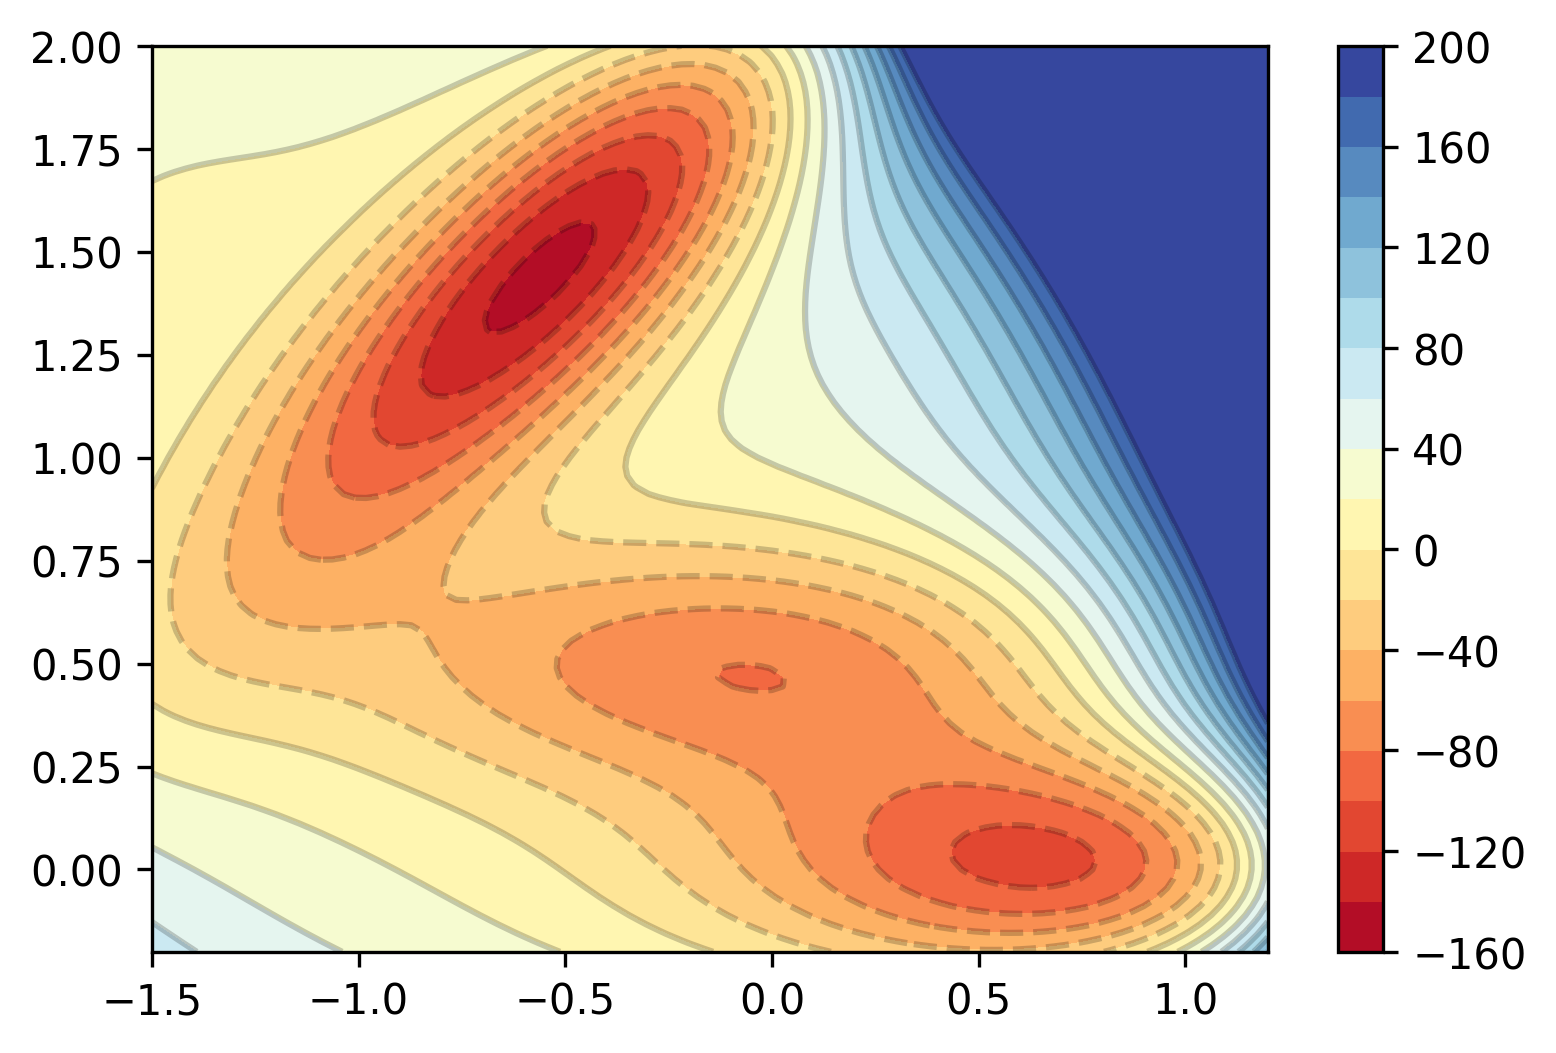

In [14]:
S.plot_V(clip_max=200, levels=20)

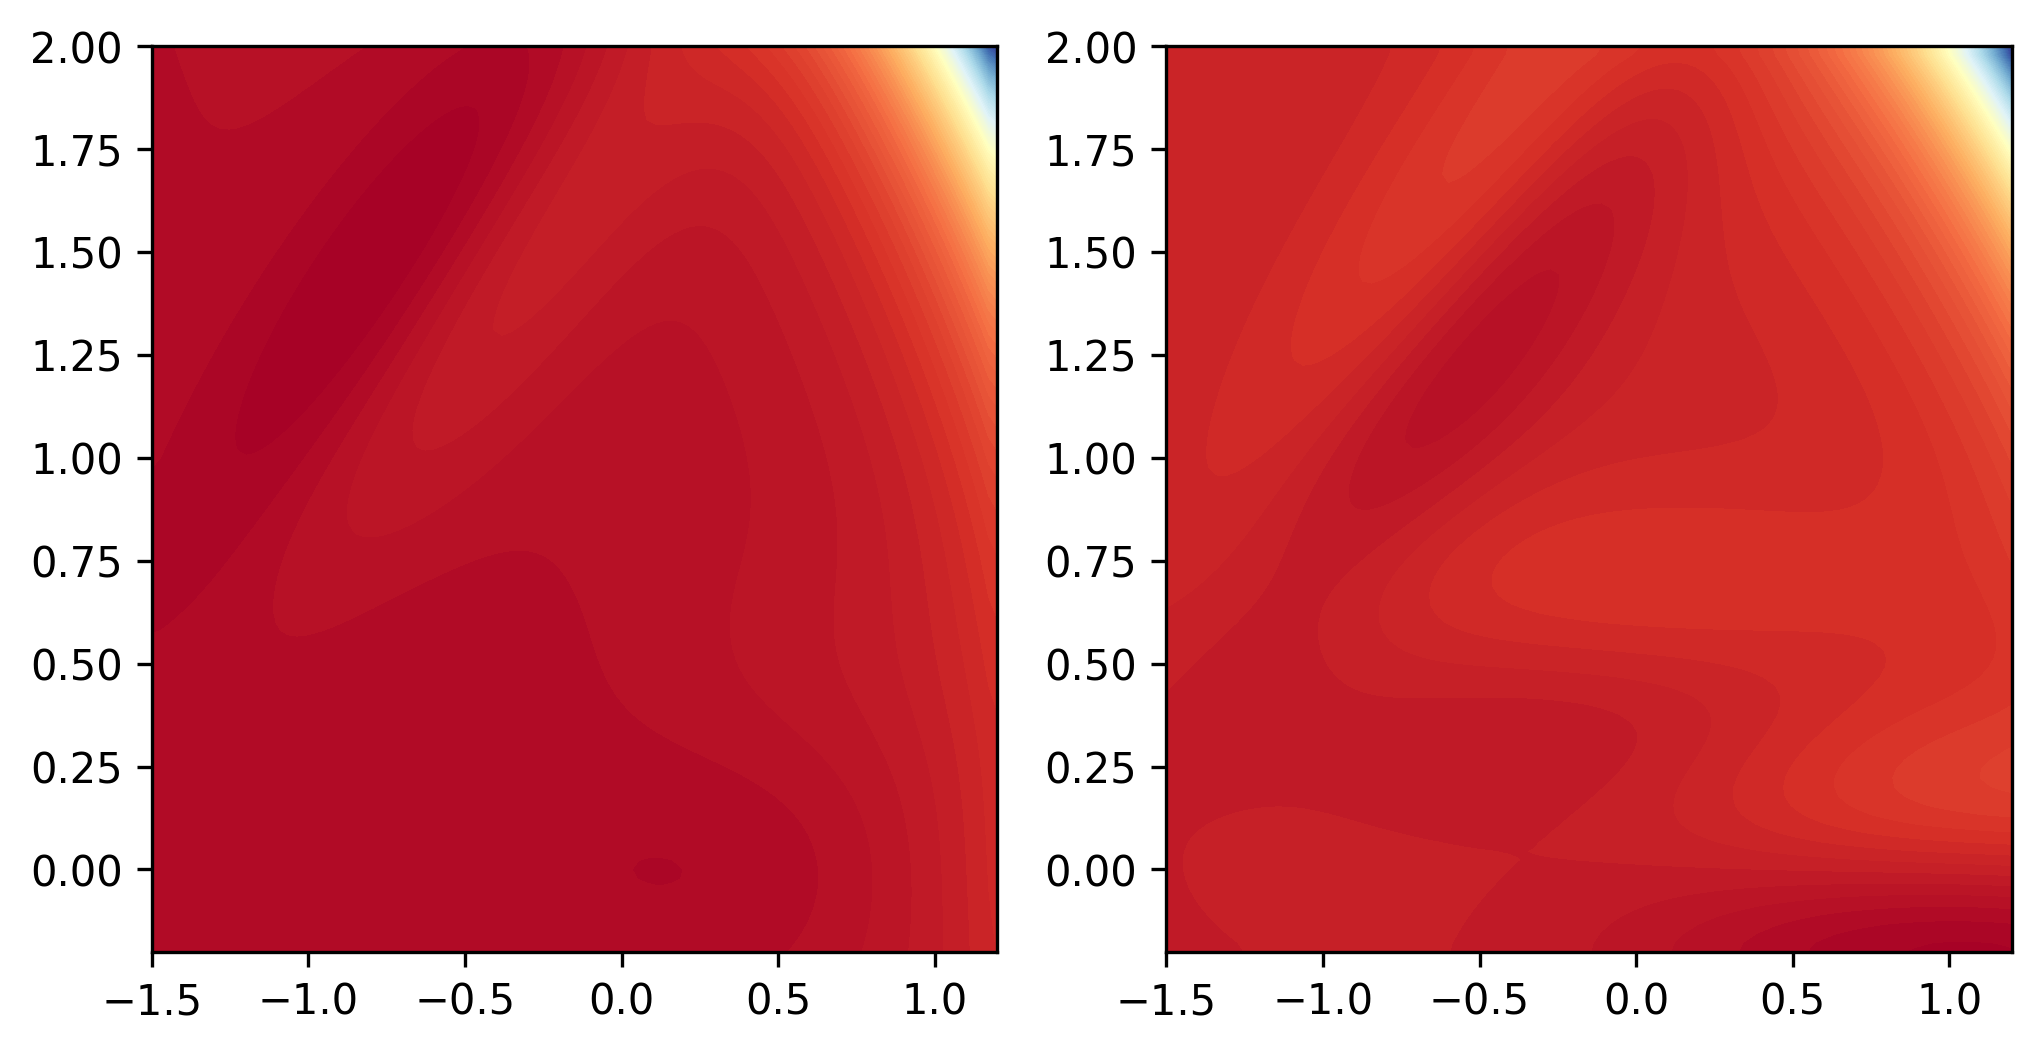

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=300)
ax[0].contourf(xx, yy, S.gradX, levels=100, cmap="RdYlBu")
ax[1].contourf(xx, yy, S.gradY, levels=100, cmap="RdYlBu")

### Compute string

In [16]:
S.compute_mep(begin=[-0.558, 1.442], end=[0.623, 0.028], maxsteps=1000, traj_every=50, npts=100)

  5%|██                                       | 50/1000 [00:52<12:34,  1.26it/s]

Change in string: 0.0196794536


 10%|████                                    | 100/1000 [01:29<10:41,  1.40it/s]

Change in string: 0.0165921764


 15%|██████                                  | 150/1000 [02:17<10:04,  1.41it/s]

Change in string: 0.0131905420


 20%|████████                                | 200/1000 [02:54<10:30,  1.27it/s]

Change in string: 0.0077957140


 25%|██████████                              | 250/1000 [03:29<07:55,  1.58it/s]

Change in string: 0.0077420099


 30%|████████████                            | 300/1000 [04:08<16:24,  1.41s/it]

Change in string: 0.0077423549


 35%|██████████████                          | 350/1000 [04:46<09:18,  1.16it/s]

Change in string: 0.0077423568


 40%|████████████████                        | 400/1000 [05:28<08:10,  1.22it/s]

Change in string: 0.0077423568


 45%|██████████████████                      | 450/1000 [06:04<08:43,  1.05it/s]

Change in string: 0.0077423568


 50%|████████████████████                    | 500/1000 [06:37<04:21,  1.91it/s]

Change in string: 0.0077423568


 55%|██████████████████████                  | 550/1000 [07:04<03:46,  1.98it/s]

Change in string: 0.0077423568


 60%|████████████████████████                | 600/1000 [07:28<02:52,  2.32it/s]

Change in string: 0.0077423568


 65%|██████████████████████████              | 650/1000 [07:51<02:30,  2.32it/s]

Change in string: 0.0077423568


 70%|████████████████████████████            | 700/1000 [08:14<02:10,  2.30it/s]

Change in string: 0.0077423568


 75%|██████████████████████████████          | 750/1000 [08:44<03:16,  1.27it/s]

Change in string: 0.0077423568


 80%|████████████████████████████████        | 800/1000 [09:12<02:05,  1.59it/s]

Change in string: 0.0077423568


 85%|██████████████████████████████████      | 850/1000 [09:43<02:57,  1.18s/it]

Change in string: 0.0077423568


 90%|████████████████████████████████████    | 900/1000 [10:13<00:51,  1.94it/s]

Change in string: 0.0077423568


 95%|██████████████████████████████████████  | 950/1000 [10:37<00:21,  2.28it/s]

Change in string: 0.0077423568


100%|███████████████████████████████████████| 1000/1000 [10:59<00:00,  1.52it/s]

Change in string: 0.0077423568


(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f82153f5bd0>)

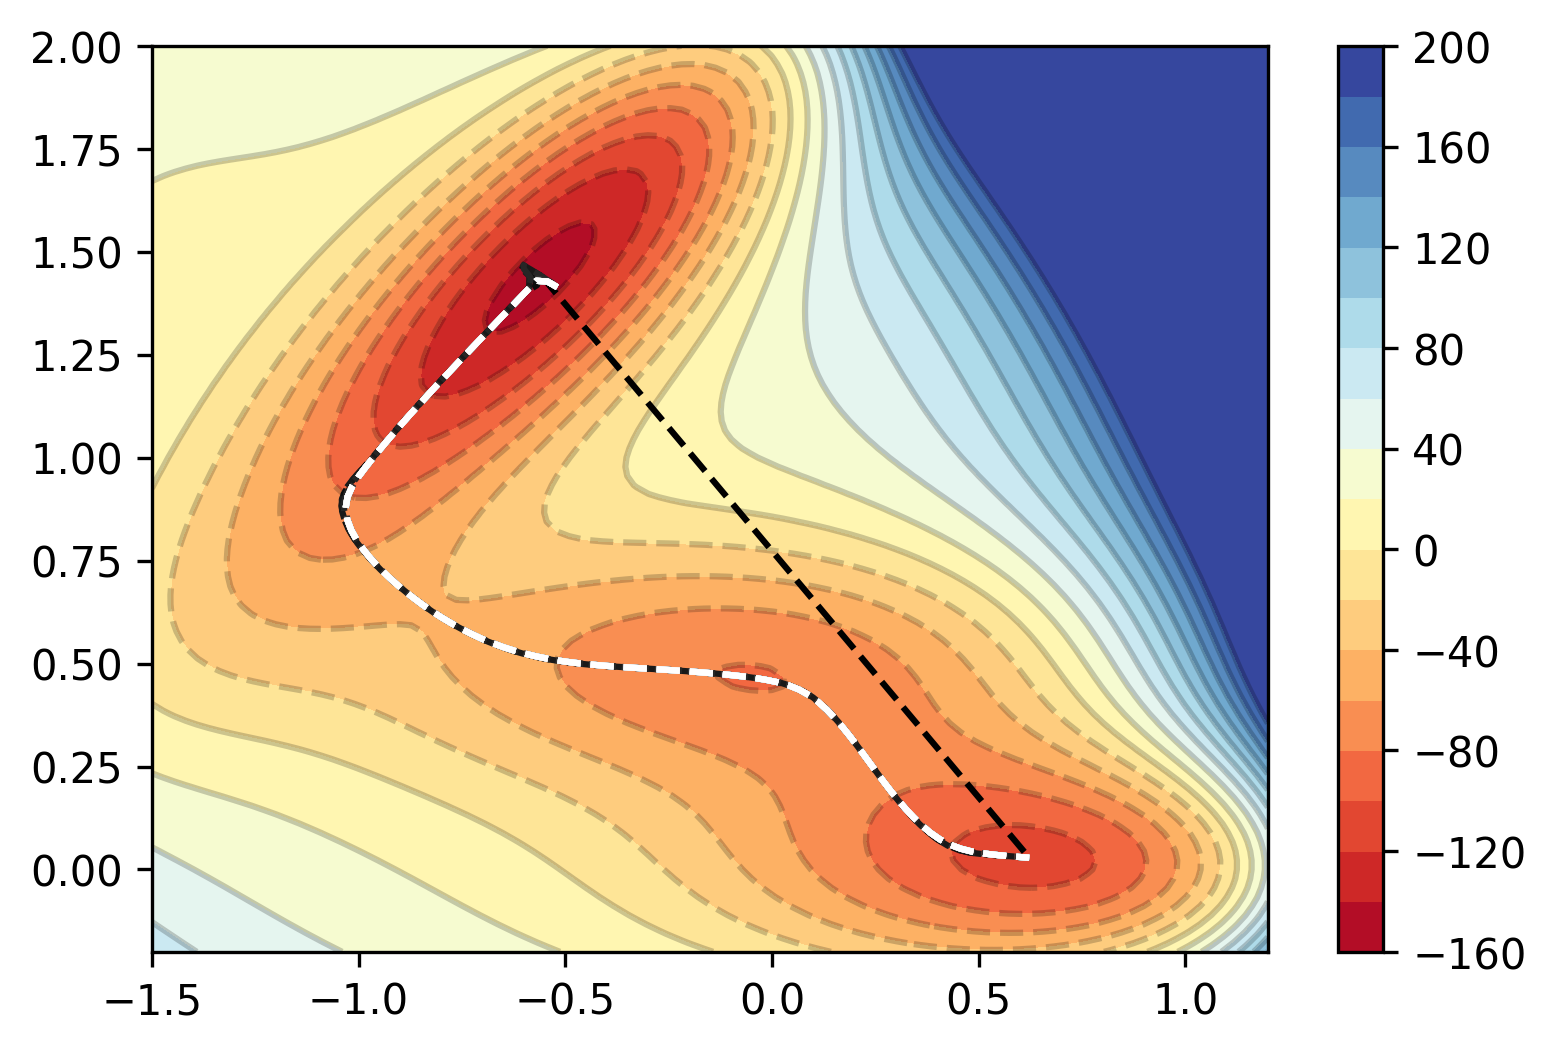

In [17]:
S.plot_string_evolution(clip_max=200, levels=20)

(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f8216760d90>)

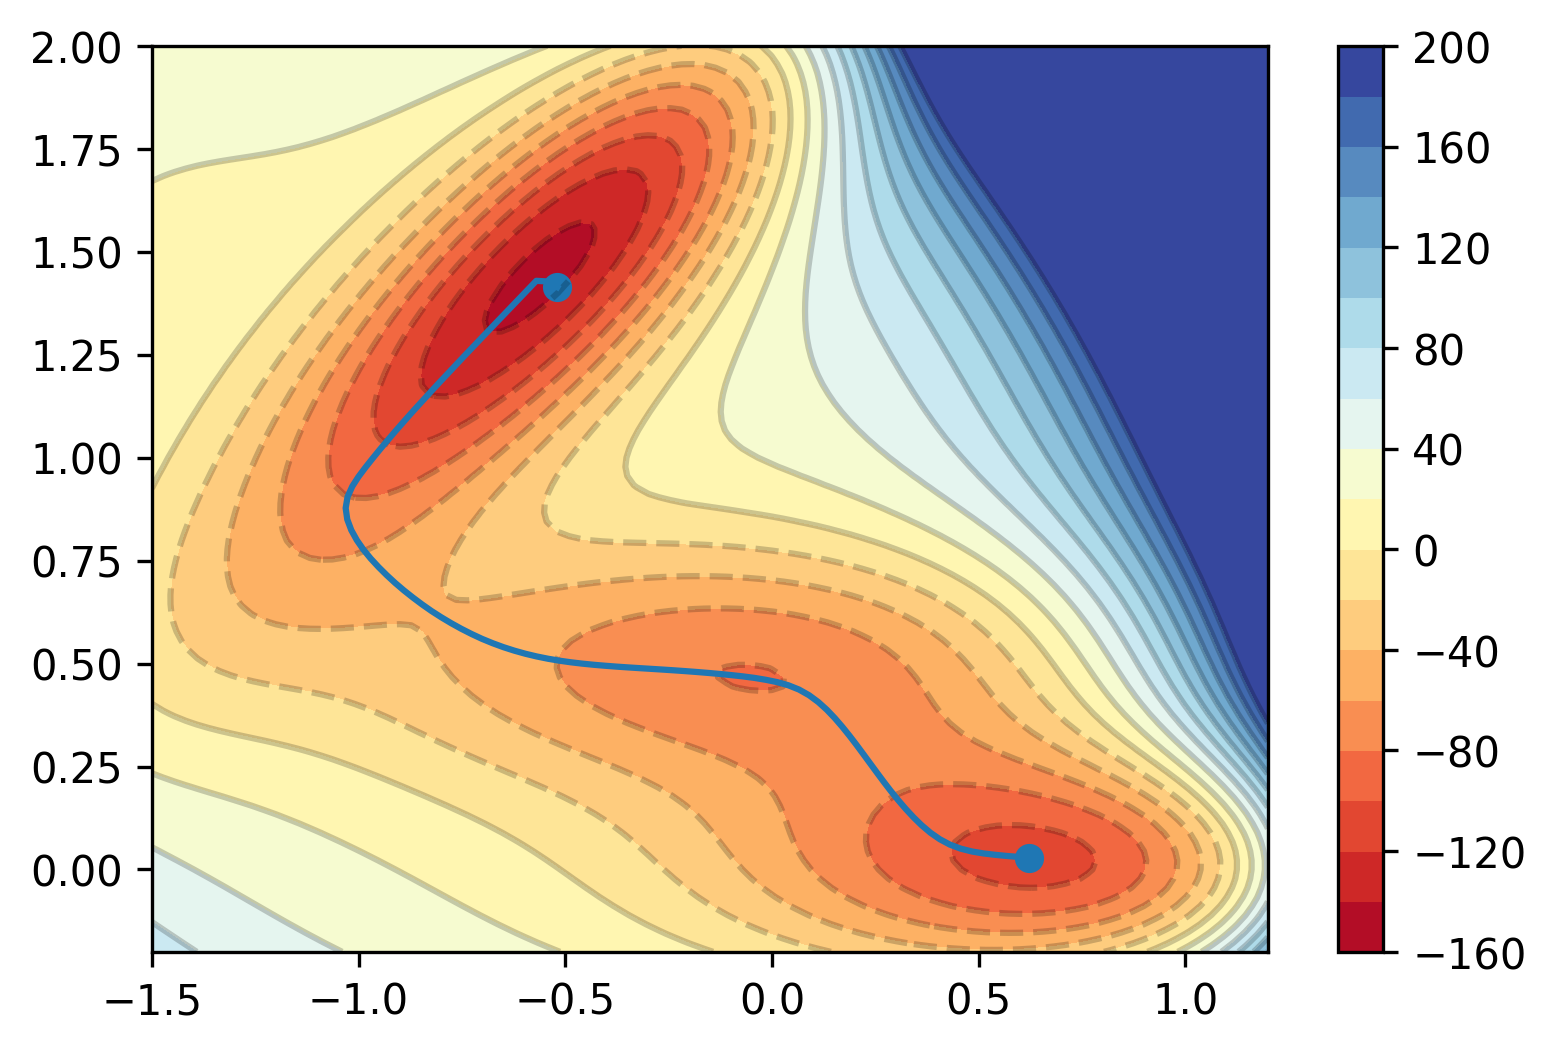

In [18]:
S.plot_mep(clip_max=200, levels=20)

(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f82167db1d0>)

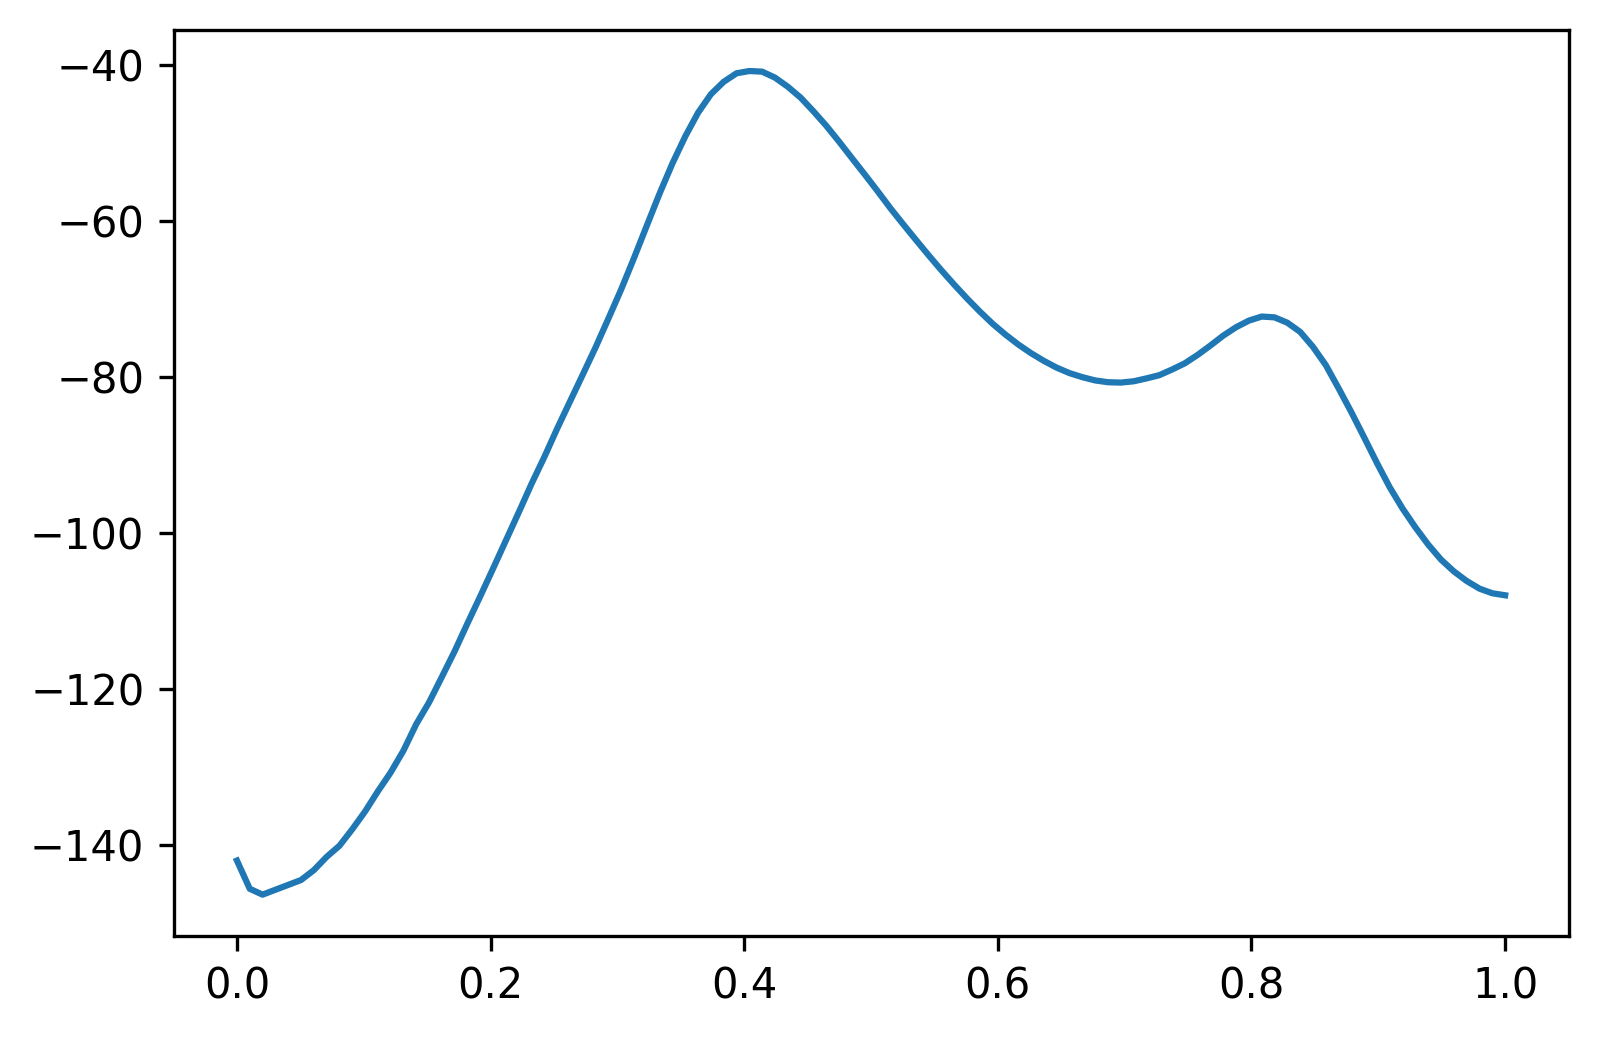

In [19]:
S.plot_mep_energy_profile()

## Three-basin potential: effect of initial guess

In [20]:
def catch_bond(x, y):
    force_x=0
    force_y=0
    y_0=1
    y_scale=5
    y_shift=4
    xy_0=0
    xy_scale=2
    gx_0=2
    gx_scale=0.5
    gy_0=-2.5
    gy_scale=0.25
    return -np.log(np.exp(-(((y - y_0) ** 2 / y_scale - y_shift) ** 2 + (x - y - xy_0) ** 2 / xy_scale)) + np.exp(-((x - gx_0) ** 2 / gx_scale + (y - gy_0) ** 2 / gy_scale))) - force_x * x - force_y * y

In [21]:
x = np.linspace(-12, 15, 100)
y = np.linspace(-6, 8, 100)
xx, yy = np.meshgrid(x, y)
V = 1000 / (8.314 * 300) * catch_bond(xx, yy)

In [22]:
S = stringmethod.String2D(x, y, V)

(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f8217376950>)

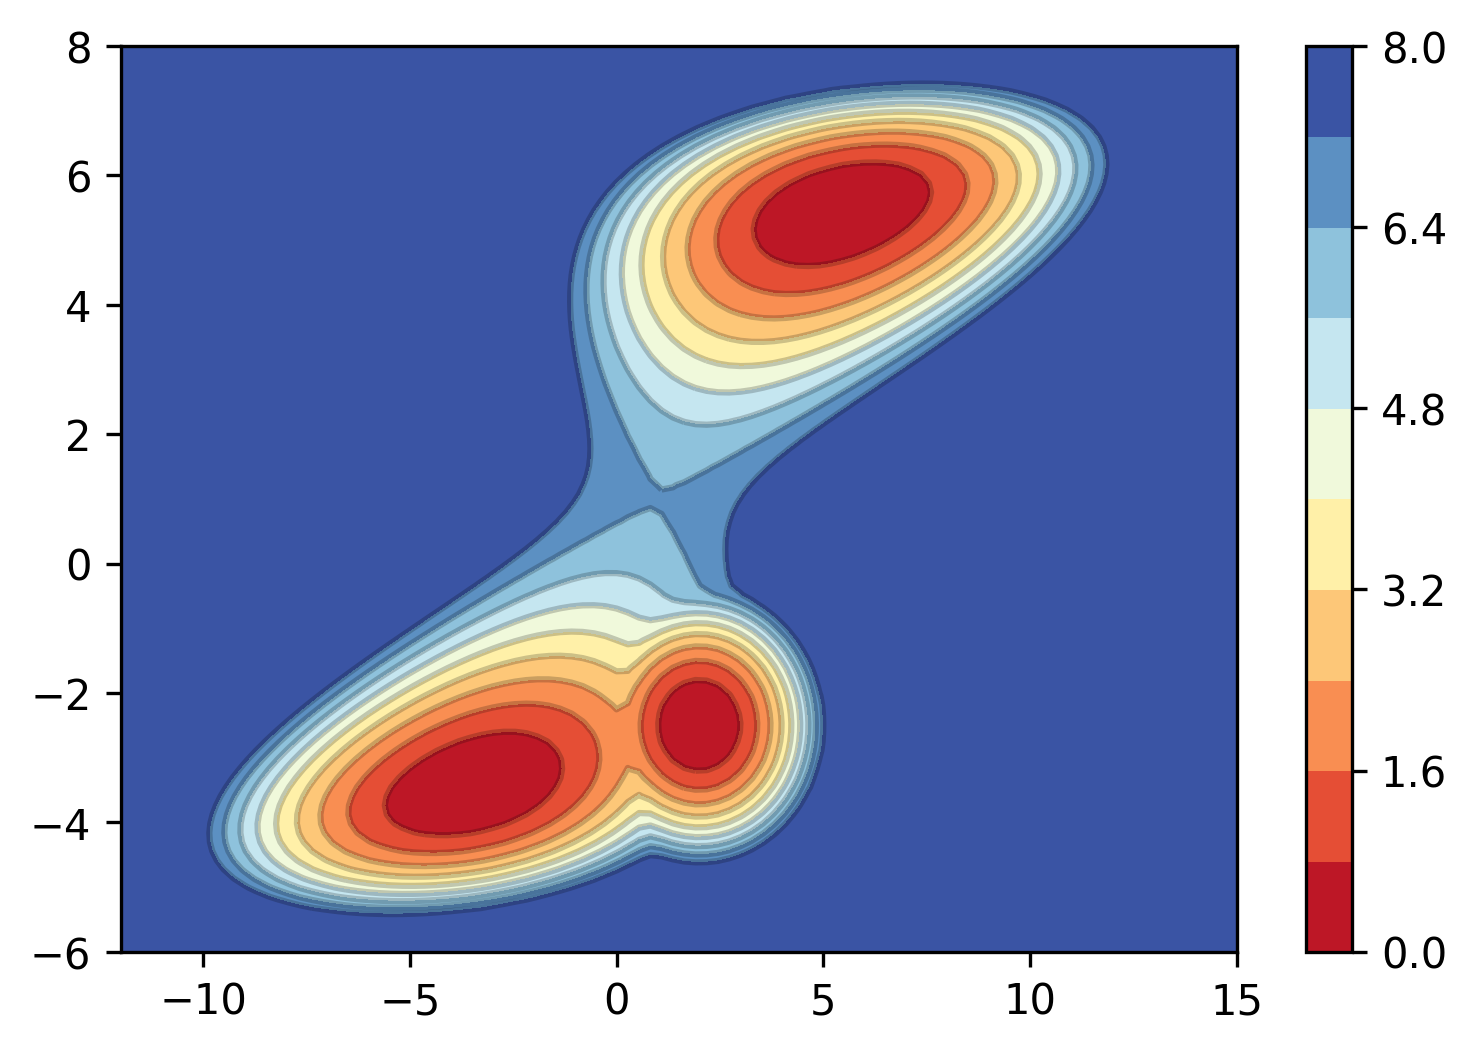

In [23]:
S.plot_V(clip_max=8, levels=10)

In [24]:
S.compute_mep(begin=[-4, -4], end=[5, 6], maxsteps=1000, traj_every=50)

  5%|██                                       | 50/1000 [00:22<06:40,  2.37it/s]

Change in string: 0.0013034112


 10%|████                                    | 100/1000 [00:44<07:36,  1.97it/s]

Change in string: 0.0000993382


 15%|██████                                  | 150/1000 [01:09<11:31,  1.23it/s]

Change in string: 0.0000075017


 20%|████████                                | 200/1000 [01:38<07:06,  1.87it/s]

Change in string: 0.0000005617


 25%|██████████                              | 250/1000 [02:03<07:17,  1.72it/s]

Change in string: 0.0000000419


 28%|███████████                             | 277/1000 [02:21<06:08,  1.96it/s]


(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f82152e13d0>)

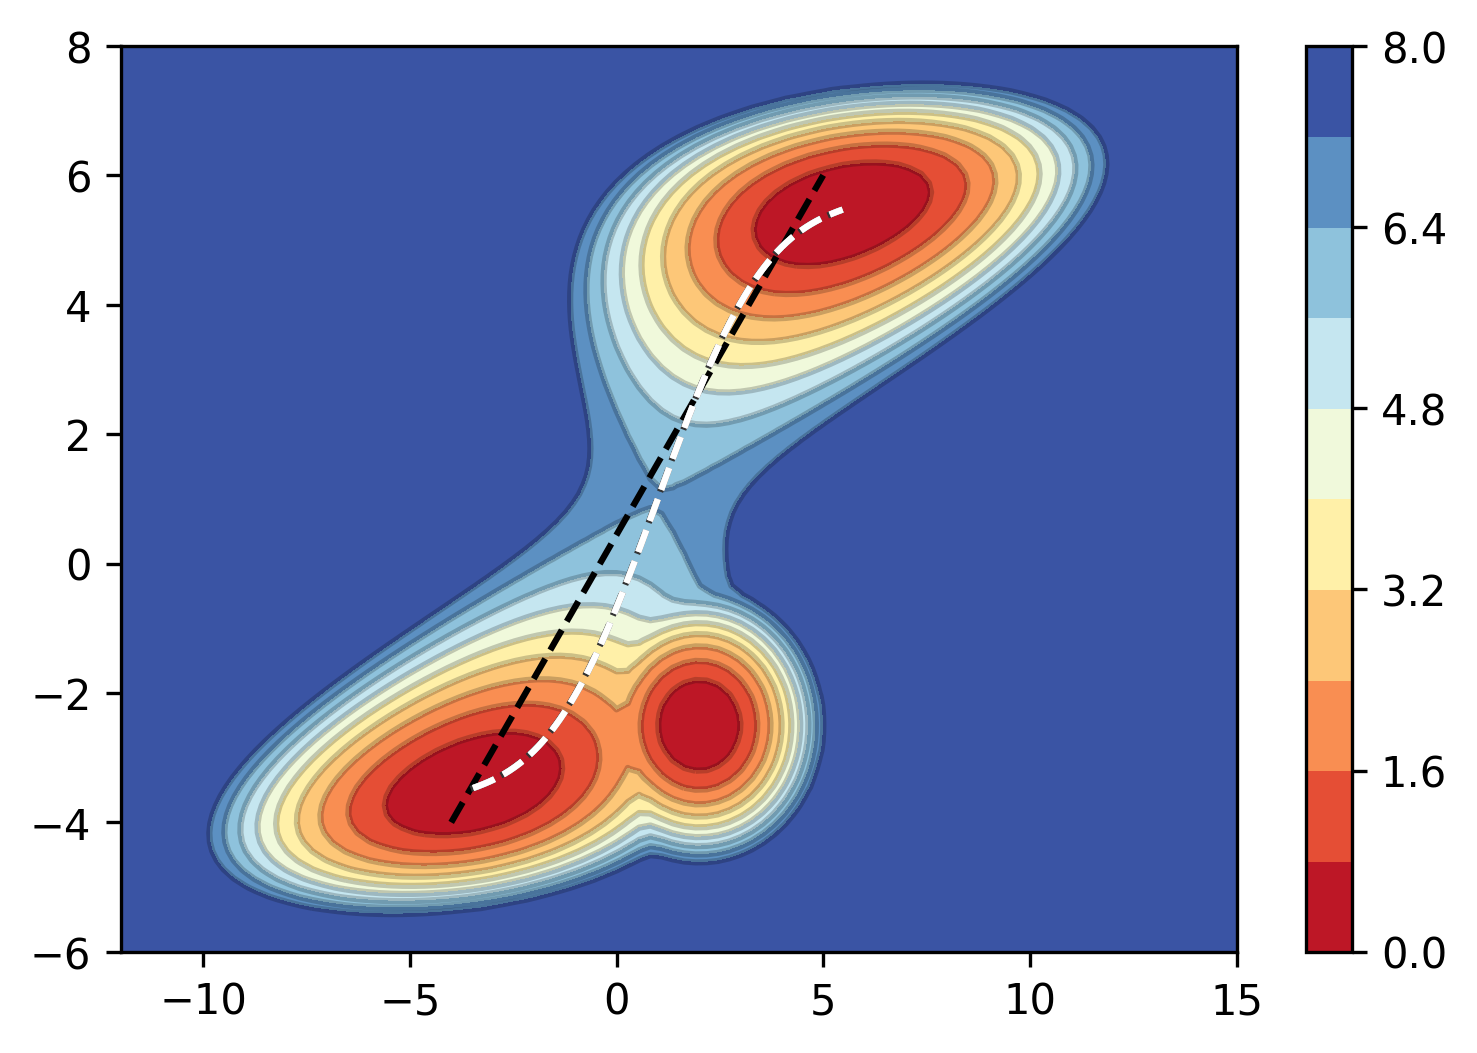

In [25]:
S.plot_string_evolution(clip_max=8, levels=10)

(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f8215df2510>)

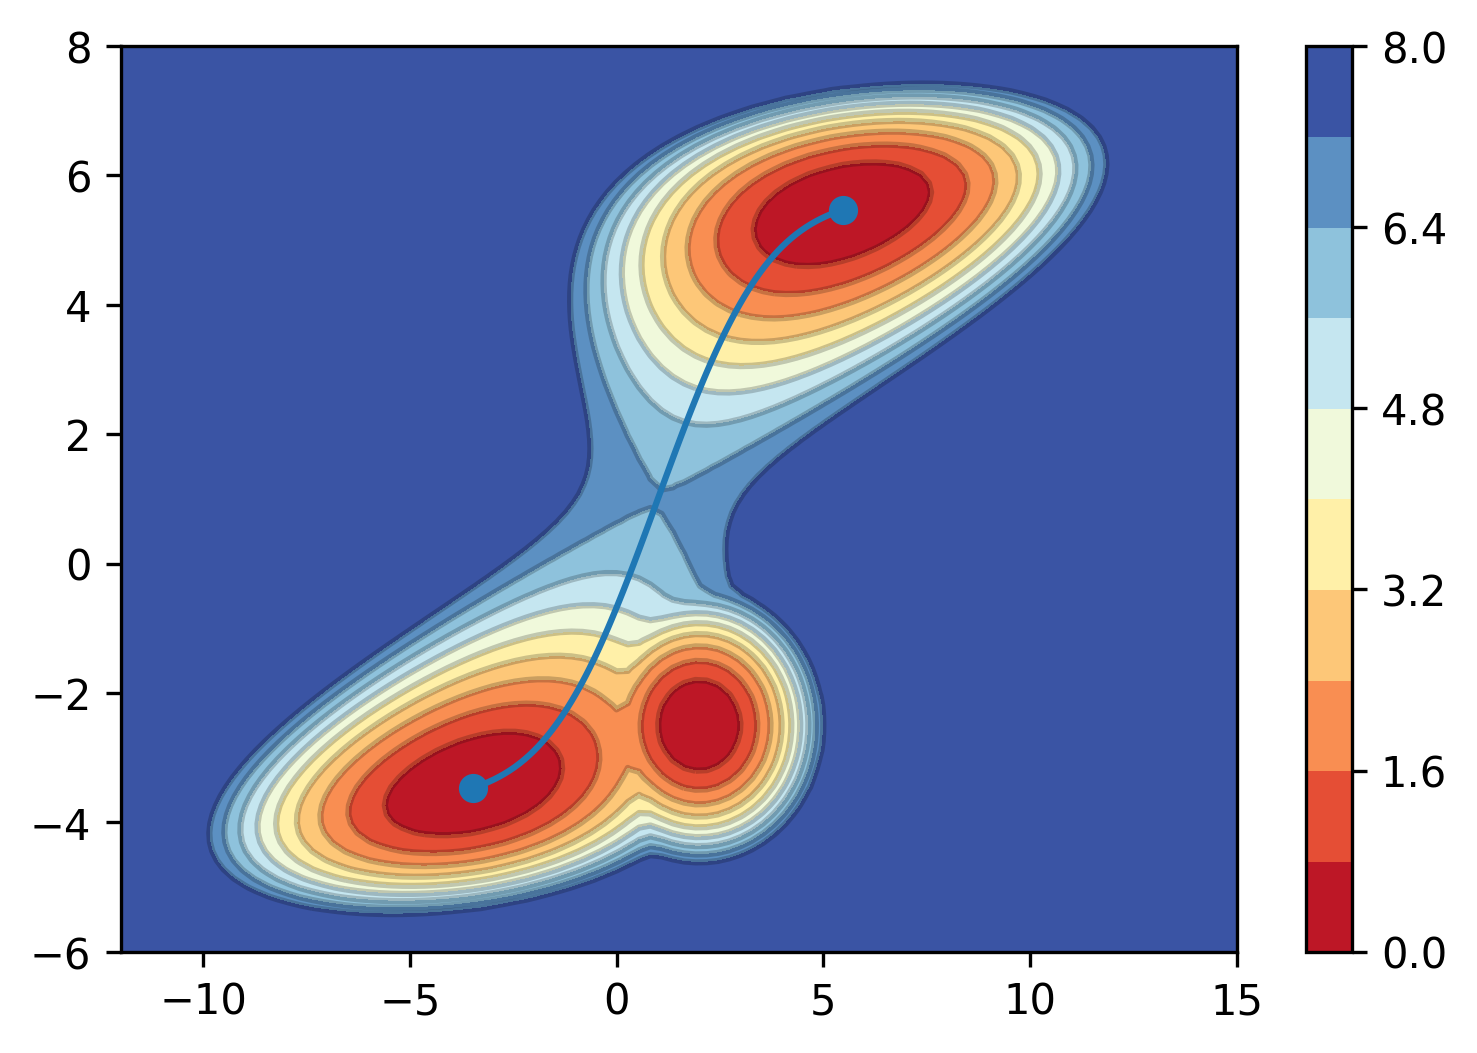

In [26]:
S.plot_mep(clip_max=8, levels=10)

(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f82167b4b10>)

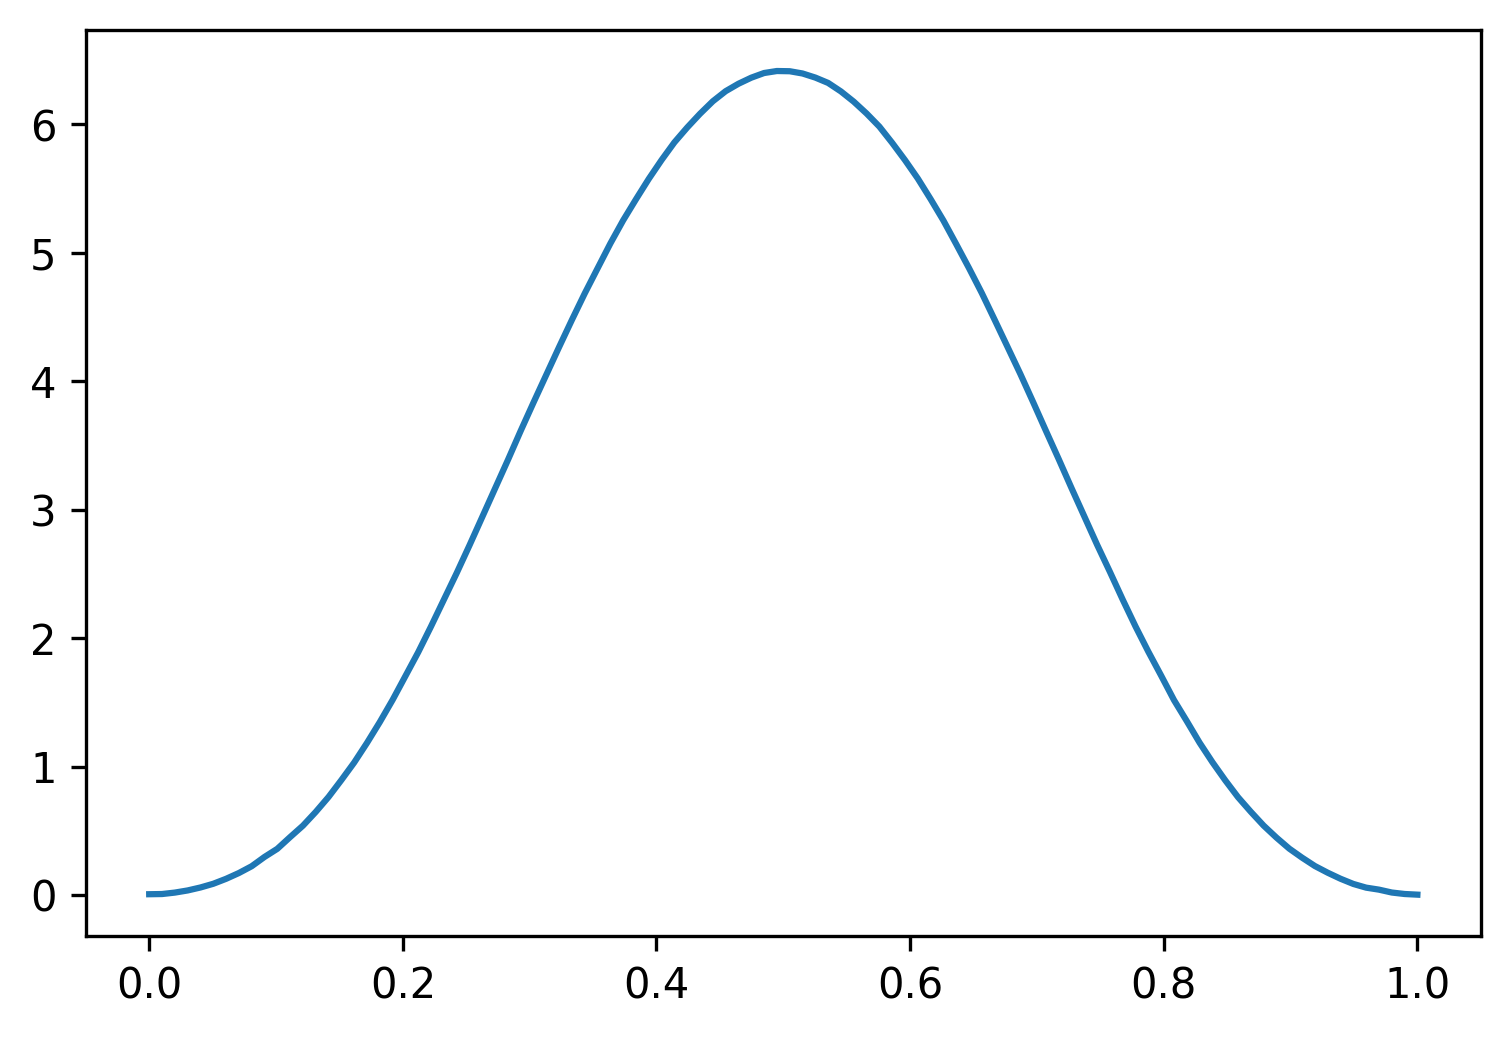

In [27]:
S.plot_mep_energy_profile()

In [28]:
S.compute_mep(begin=[-4, -4], mid=[[2, -2.5]], end=[5, 6], maxsteps=1000, traj_every=50)

  5%|██                                       | 50/1000 [00:35<10:22,  1.52it/s]

Change in string: 0.0120527065


 10%|████                                    | 100/1000 [01:13<10:31,  1.43it/s]

Change in string: 0.0068461280


 15%|██████                                  | 150/1000 [01:46<08:12,  1.73it/s]

Change in string: 0.0106844732


 20%|████████                                | 200/1000 [02:18<08:08,  1.64it/s]

Change in string: 0.0087248865


 25%|██████████                              | 250/1000 [03:02<36:24,  2.91s/it]

Change in string: 0.0092811739


 30%|████████████                            | 300/1000 [03:41<06:46,  1.72it/s]

Change in string: 0.0026888760


 35%|██████████████                          | 350/1000 [04:11<07:23,  1.47it/s]

Change in string: 0.0000237630


 40%|████████████████                        | 400/1000 [04:40<05:33,  1.80it/s]

Change in string: 0.0000072712


 45%|██████████████████                      | 450/1000 [05:11<05:08,  1.78it/s]

Change in string: 0.0000029574


 50%|████████████████████                    | 500/1000 [05:43<04:32,  1.83it/s]

Change in string: 0.0000012361


 55%|██████████████████████                  | 550/1000 [06:14<05:19,  1.41it/s]

Change in string: 0.0000005195


 60%|████████████████████████                | 600/1000 [06:44<04:11,  1.59it/s]

Change in string: 0.0000002188


 65%|██████████████████████████              | 650/1000 [07:20<05:38,  1.03it/s]

Change in string: 0.0000000922


 70%|████████████████████████████            | 700/1000 [07:45<02:38,  1.90it/s]

Change in string: 0.0000000389


 75%|██████████████████████████████          | 750/1000 [08:09<01:52,  2.22it/s]

Change in string: 0.0000000164


 78%|███████████████████████████████         | 778/1000 [08:21<02:23,  1.55it/s]


(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f81fa6e6390>)

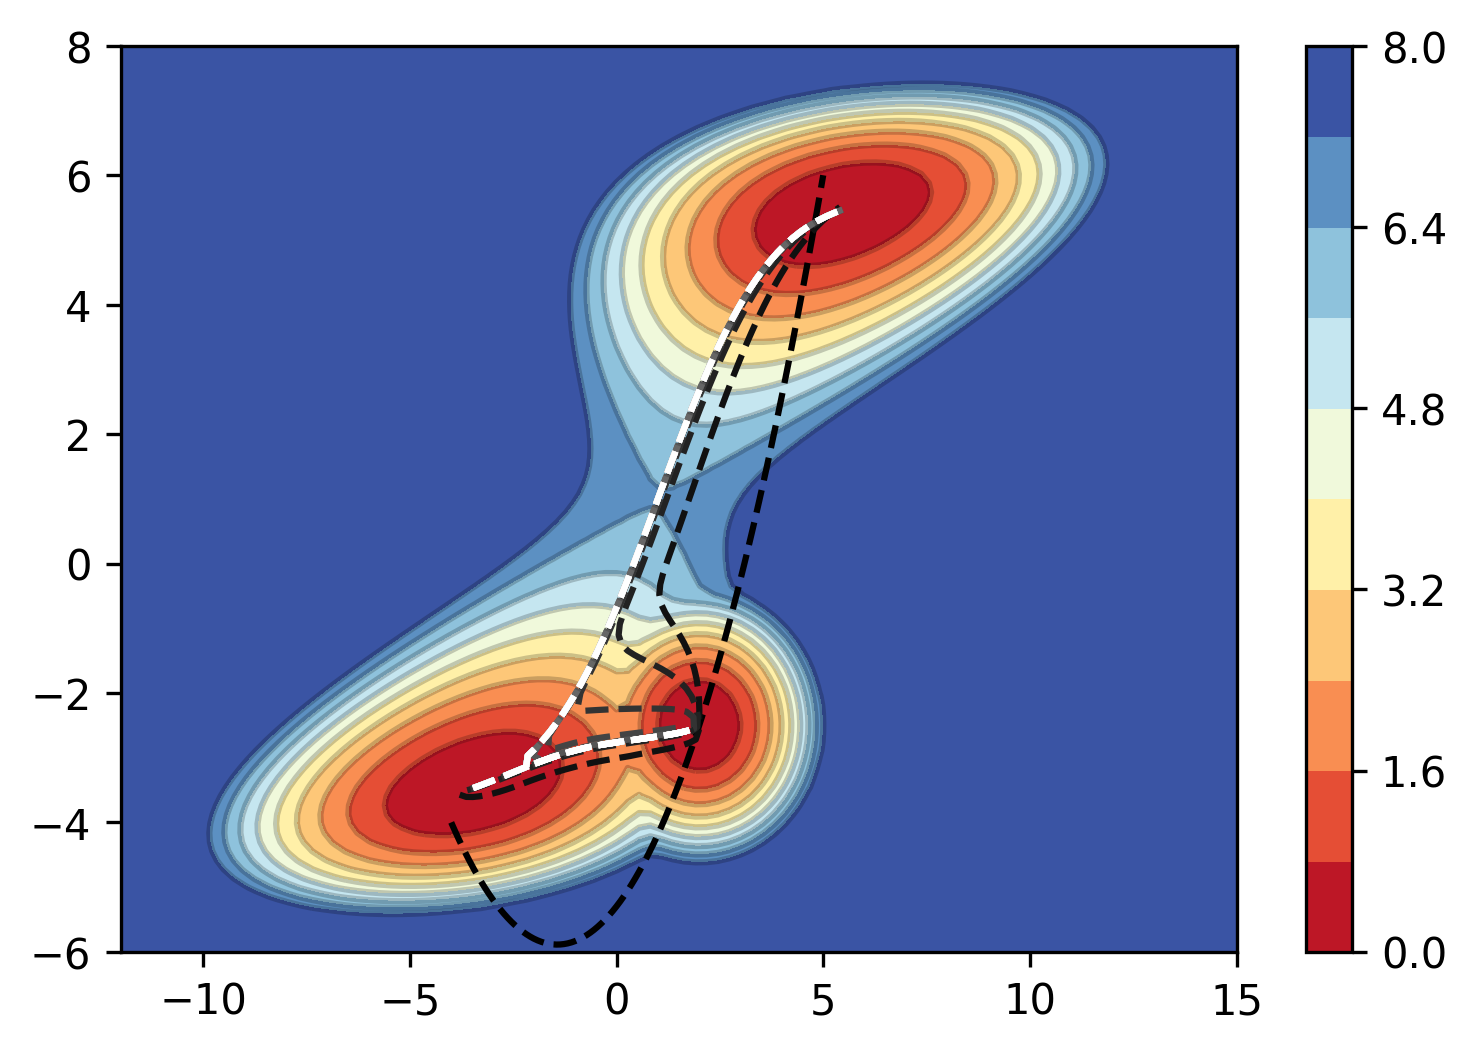

In [29]:
S.plot_string_evolution(clip_max=8, levels=10)

(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f81fa626190>)

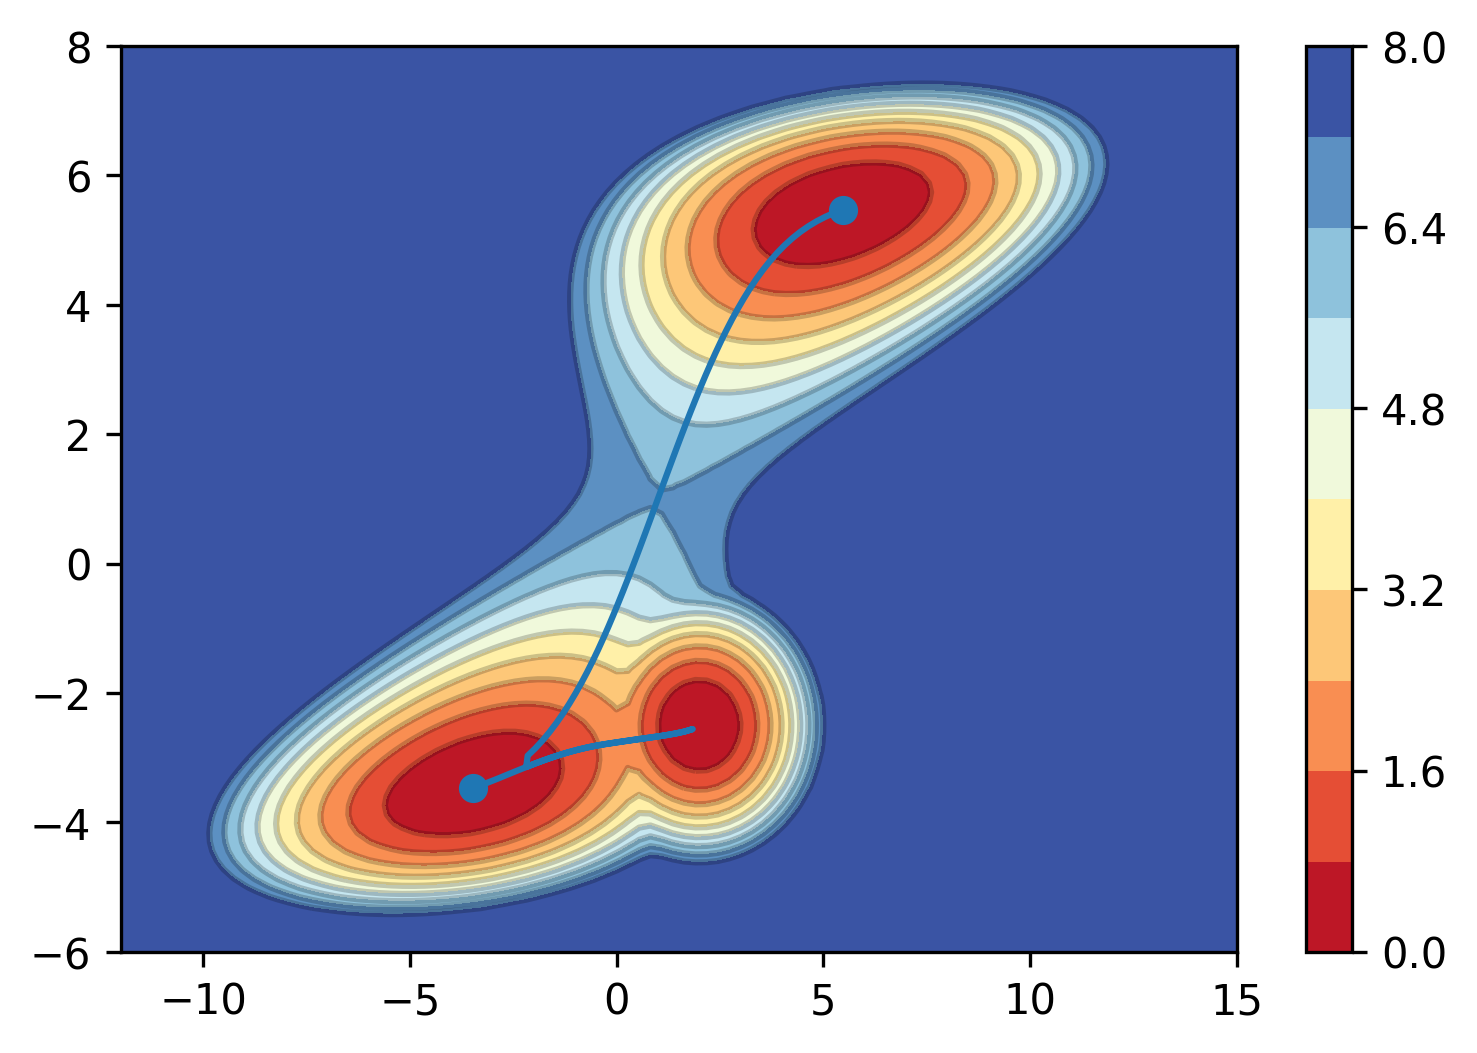

In [30]:
S.plot_mep(clip_max=8, levels=10)

(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f81fb9a3390>)

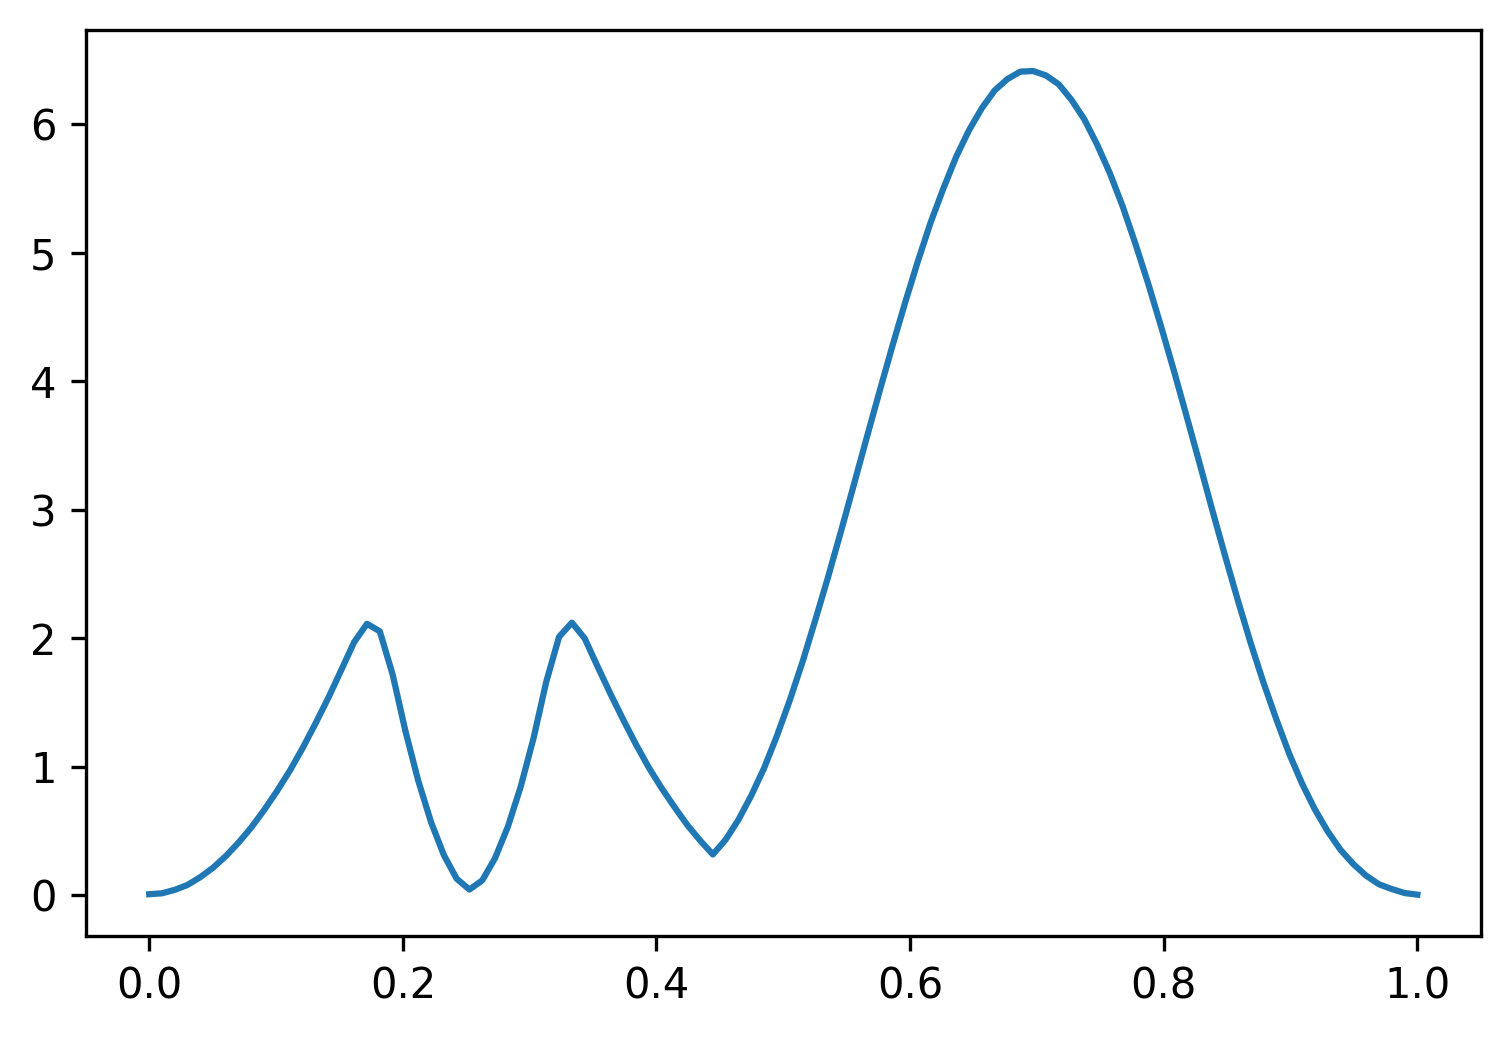

In [31]:
S.plot_mep_energy_profile()